# Bitcoin Data Analysis

## Importing the neccesary libraries for the analysis

In [3]:
import pandas as pd
from pathlib import Path
import numpy as np 

In [4]:
bitcoin_1 = pd.read_csv(Path('./bitcoin_1.csv'), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)
bitcoin_1.head()

,Close
Timestamp,
2015-01-01 00:00:00,314.0
2015-01-01 00:01:00,314.0
2015-01-01 00:02:00,314.0
2015-01-01 00:03:00,314.0
2015-01-01 00:04:00,313.9


In [11]:
bitcoin_2= pd.read_csv(Path('./bitcoin_2.csv'), index_col="Timestamp", parse_dates=True, infer_datetime_format=True)
bitcoin_2.head()

,Close
Timestamp,
2015-01-07 20:24:00,360.00
2015-01-07 20:27:00,276.34
2015-01-07 20:28:00,271.60
2015-01-07 20:29:00,344.67
2015-01-07 20:30:00,305.38


## Prepare the Data for analysis finding null values

In [7]:
bitcoin_1.isnull().sum()

Close    0
dtype: int64

In [12]:
bitcoin_2.isnull().sum()

Close    0
dtype: int64

#### Finding Duplicated values

In [21]:
bitcoin_1.duplicated()

Timestamp
2015-01-01 00:00:00    False
2015-01-01 00:01:00     True
2015-01-01 00:02:00     True
2015-01-01 00:03:00     True
2015-01-01 00:04:00    False
                       ...  
2015-12-31 23:53:00     True
2015-12-31 23:54:00     True
2015-12-31 23:56:00     True
2015-12-31 23:57:00     True
2015-12-31 23:58:00     True
Length: 372773, dtype: bool

In [22]:
bitcoin_2.duplicated()

Timestamp
2015-01-07 20:24:00    False
2015-01-07 20:27:00    False
2015-01-07 20:28:00    False
2015-01-07 20:29:00    False
2015-01-07 20:30:00    False
                       ...  
2015-12-31 23:55:00     True
2015-12-31 23:56:00     True
2015-12-31 23:57:00     True
2015-12-31 23:58:00     True
2015-12-31 23:59:00     True
Length: 440797, dtype: bool

In [19]:
bitcoin_1['Close'].dtypes

dtype('float64')

In [20]:
bitcoin_2['Close'].dtypes

dtype('float64')

## Comparing the Data using more statiscally analysis describe method

In [23]:
bitcoin_1.describe()

,Close
count,372773.000000
mean,274.423996
std,61.778634
min,153.100000
25%,233.850000
50%,248.950000
75%,288.820000
max,501.960000


In [24]:
bitcoin_2.describe()

,Close
count,440797.000000
mean,275.956285
std,60.728446
min,109.940000
25%,235.810000
50%,250.540000
75%,289.260000
max,499.260000


## Creating visualizations to compare the two data informations

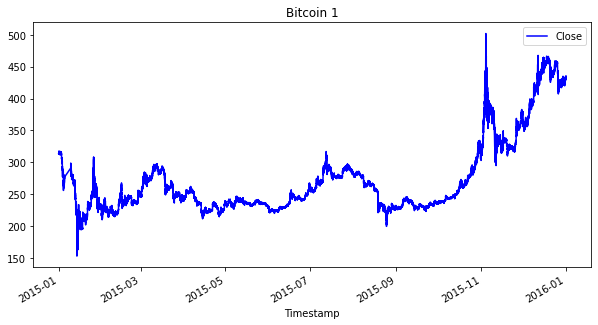

In [25]:
bitcoin_1.plot(figsize=(10, 5), title="Bitcoin 1", color="blue")

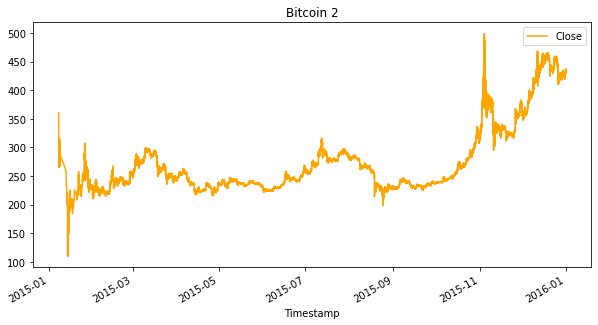

In [27]:
bitcoin_2.plot(figsize=(10, 5), title="Bitcoin 2",color="Orange")

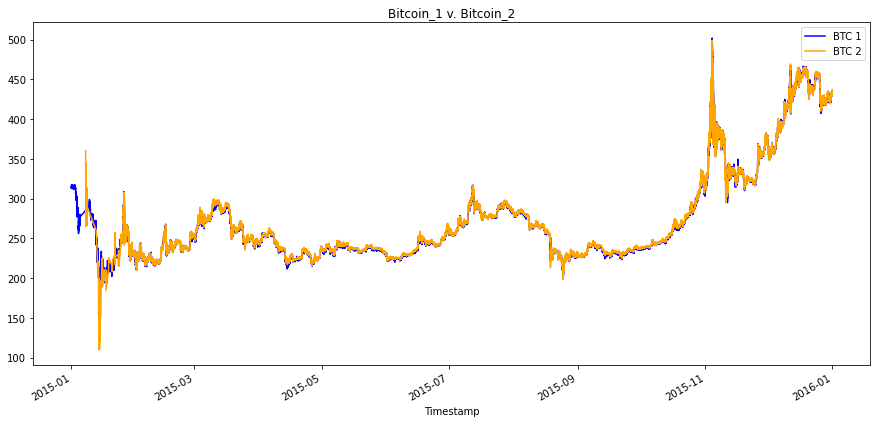

In [30]:
bitcoin_1['Close'].plot(legend=True, figsize=(15, 7), title="Bitcoin_1 v. Bitcoin_2", color="blue", label="BTC 1")
bitcoin_2['Close'].plot(legend=True, figsize=(15, 7), color="orange", label="BTC 2")

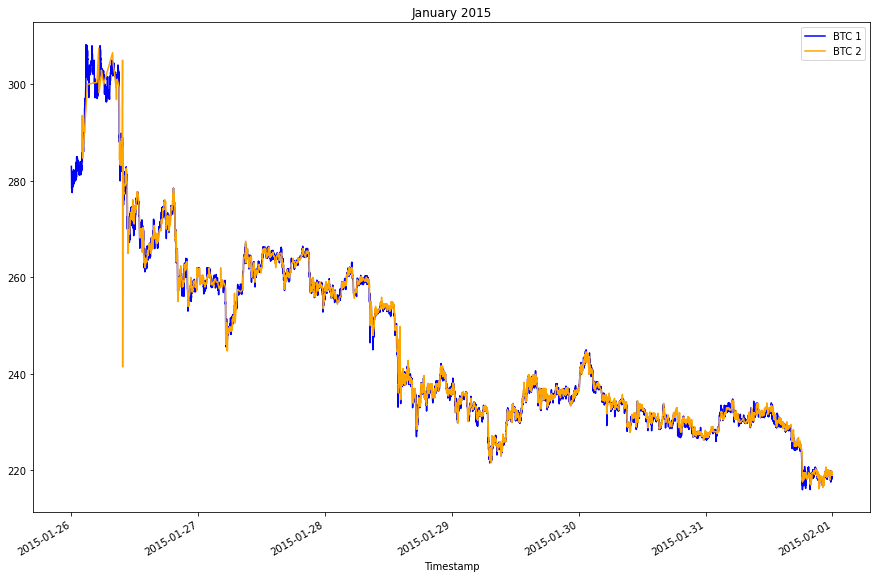

In [31]:
bitcoin_1['Close'].loc['2015-01-26' : '2015-01-31'].plot(
    legend=True, figsize=(15, 10), title="January 2015", color="blue", label="BTC 1")
bitcoin_2['Close'].loc['2015-01-26' : '2015-01-31'].plot(
    legend=True, figsize=(15, 10), color="orange", label="BTC 2")


## Arbitrage analysis

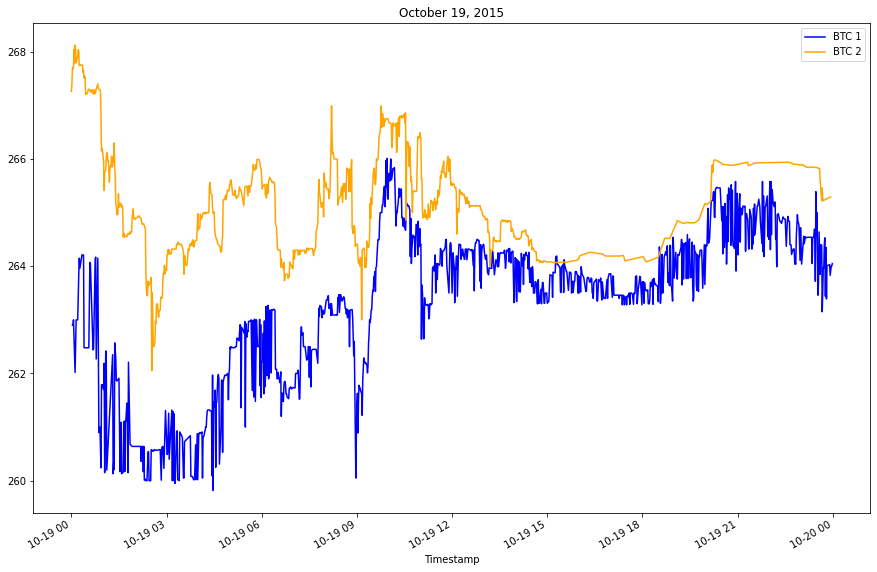

In [32]:
bitcoin_1['Close'].loc['2015-10-19'].plot(
    legend=True, figsize=(15, 10), title="October 19, 2015", color="blue", label="BTC 1")
bitcoin_2['Close'].loc['2015-10-19'].plot(
    legend=True, figsize=(15, 10), color="orange", label="BTC 2")

In [35]:
arbitrage_spread = bitcoin_2['Close'].loc['2015-10-19'] - bitcoin_1['Close'].loc['2015-10-19']
arbitrage_spread.describe()


count    666.000000
mean       2.105991
std        1.334641
min       -0.120000
25%        0.990000
50%        1.905000
75%        3.052500
max        6.610000
Name: Close, dtype: float64

In [37]:
# Use the arbitrage_spread to determine the return percentage of the trades with a positive spread
# Include only the trades that have an arbitrage_spread that’s greater than 0
# Use the bitcoin_1 prices from the day as the denominator

spread_return = arbitrage_spread[arbitrage_spread>0] / bitcoin_1['Close'].loc['2015-10-19']

In [38]:
# Create a profitable_trades DataFrame
# Show only those trades where the spread_return is greater than 1% (.01)
profitable_trades = spread_return[spread_return > .01]
profitable_trades.head(10)

Timestamp
2015-10-19 00:02:00    0.018258
2015-10-19 00:03:00    0.018182
2015-10-19 00:04:00    0.017871
2015-10-19 00:07:00    0.023281
2015-10-19 00:09:00    0.018213
2015-10-19 00:10:00    0.018403
2015-10-19 00:12:00    0.018669
2015-10-19 00:13:00    0.017423
2015-10-19 00:14:00    0.015728
2015-10-19 00:15:00    0.013591
Name: Close, dtype: float64

In [39]:
# Print the summary statistics for the profitable_trades DataFrame
profitable_trades.describe()

count    208.000000
mean       0.014413
std        0.002982
min        0.010044
25%        0.011969
50%        0.013963
75%        0.016431
max        0.025400
Name: Close, dtype: float64

In [40]:
"""
To calculate the profit in dollars, we need to multiply the 208 returns that are greater than 1% by the cost of what we’d purchase—in this case, bitcoin_1.
As a reminder, the following image shows the profitable trades:
"""

profit = profitable_trades * bitcoin_1['Close'].loc['2015-10-19']
profit

Timestamp
2015-10-19 00:02:00    4.80
2015-10-19 00:03:00    4.78
2015-10-19 00:04:00    4.70
2015-10-19 00:07:00    6.10
2015-10-19 00:09:00    4.79
                       ... 
2015-10-19 23:54:00     NaN
2015-10-19 23:55:00     NaN
2015-10-19 23:57:00     NaN
2015-10-19 23:58:00     NaN
2015-10-19 23:59:00     NaN
Name: Close, Length: 1083, dtype: float64

In [42]:
profit_per_trade = profit.dropna()
profit_per_trade.describe()

count    208.000000
mean       3.767500
std        0.772626
min        2.630000
25%        3.135000
50%        3.645000
75%        4.282500
max        6.610000
Name: Close, dtype: float64

In [43]:
profit_sum = profit_per_trade.sum()
profit_sum

783.6400000000015

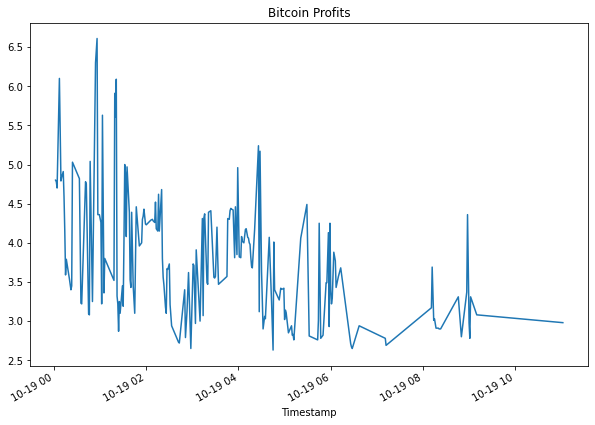

In [44]:
profit_per_trade.plot(figsize=(10, 7), title="Bitcoin Profits")

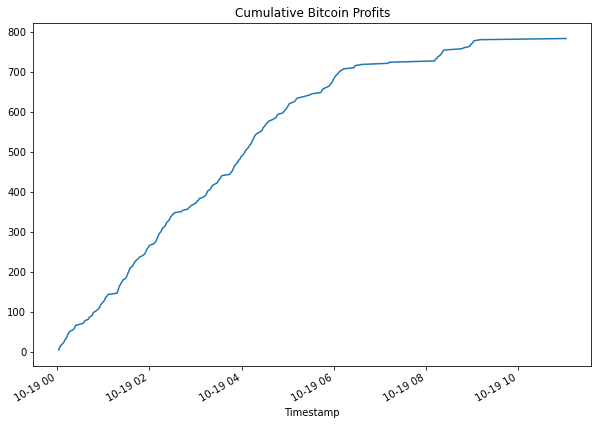

In [45]:
cumulative_profit = profit_per_trade.cumsum()
cumulative_profit.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits")